# AI Explanation
## Notes
- Every Markdown and code cell after this was generated by ChatGPT 5 Extended Thinking. The only exception to this is that I needed to seperate certian merged sections of Python code into multiple cells for readability of the graphs.
- You can read my full conversation here if you would like: https://chatgpt.com/share/68f98977-3038-8005-b1d9-02f582f1d495
  - Note that there is some 2/2 prompts in there. That is because I forgot some important context that the LLM would need that I didn't realize I forgot until it gave its output.
  - There's also far more information in the actual conversation than my summaries below becuase while it woked most of the time, I

## Important Prompts (Summarized and Reworded)
1. In the following prompts, I'm going to ask you to generate a report on the provided Kaggle dataset. Assume the dataset is saved in "card_transdata.csv".
2. First, create is a section titled "Data Context," which explains what the dataset is. Please include a table with the features and an explanation of what each feature means.
3. Next, you need to load the libraries.
4. Next, load the CSV file as well as print the head, shape, info, and describe of the data.
5. Next, generate a data wrangling section. First, print the sum for each column that is null. Then I want you to create a new DataFrame variable that is simply the old one, but with the NAs dropped. Then print the shape and head of this new dataset.
6. Next, visualize the data. Generate the following graphs:
   1. A countplot for the feature fraud with the title "Fraud Class Distribution".
   2. Same countplot idea as before, but for the "used_pin_number" feature.
   3. Same thing again, but for "online_orders".
   4. Same thing again, but for "repeat_retailer".
   5. A histogram comparing the"ratio_to_median_purchase_price" distribution and the title "Ratio to Median Purchase Price Distribution".
   6. Same histogram idea as before, but for "distance_from_home".
7. Next, make bivariate visualizations. Add a hue for the "fraud" feature with colors red for fraudulent and green for non-fraudulent. The graphs are:
   1. A countplot for "used_pin_number" with the title "Transactions with PIN vs Fraudulent Transactions". Also, make a percentage plot based on whether or not the PIN was used from "used_pin_number".
   2. A countplot similar to the one mentioned for "used_pin_number" but for "used_chip". Also, make the appropriate percentage plot for this one as well.
   3. The appropriate countplot and percentage plots similar to the ones mentioned before, but for "online_order".
   4. A scatterplot of the breakdown of fraudulent and non-fraudulent transactions for "distance_from_last_transaction" vs "ratio_to_median_purchase_price".
   5. A scatterplot similar to the one I just mentioned, but for "distance_from_home" and "ratio_to_median_purchase_price".

# Data Context

This project uses the **Credit Card Fraud** dataset hosted on Kaggle, a labeled transaction-level dataset for binary classification of fraudulent activity (`fraud` = 1) vs. legitimate transactions (`fraud` = 0). URL: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data  :contentReference[oaicite:0]{index=0}

## Feature Dictionary

| Feature                         | Meaning (high level)                                                                 |
|---------------------------------|---------------------------------------------------------------------------------------|
| `distance_from_home`            | Geographical distance between the cardholder’s home and the transaction location.     |
| `distance_from_last_transaction`| Distance between the current transaction’s location and that of the immediately prior transaction by the same card. |
| `ratio_to_median_purchase_price`| Current transaction amount divided by the cardholder’s median purchase price.         |
| `repeat_retailer`               | Whether the merchant is one the cardholder has transacted with before.               |
| `used_chip`                     | Whether a chip-present (EMV) method was used.                                        |
| `used_pin_number`               | Whether a PIN was used to authorize the transaction.                                  |
| `online_order`                  | Whether the transaction was card-not-present (e.g., an online order).                 |
| `fraud`                         | Target label indicating a fraudulent transaction (1) or not (0).                      |

> Notes: The dataset documentation and derivative studies commonly define the three distance/ratio measures as above; units for distances are not specified in Kaggle’s description and should be treated as continuous behavioral signals rather than physical units. :contentReference[oaicite:1]{index=1}


# Loading Libraries

We’ll use **pandas** for tabular data handling and **seaborn/matplotlib** for visualization. For reproducibility and consistent rendering across runs, this cell also fixes a `RANDOM_STATE`, applies stable plotting/display defaults, and prints library versions.

In [1]:
# Imports and global defaults
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots render inline in notebooks (safe no-op outside IPython)
try:
    get_ipython().run_line_magic("matplotlib", "inline")
except Exception:
    pass

# Visualization defaults
sns.set_theme(context="notebook", style="whitegrid")
plt.rcParams.update({
    "figure.dpi": 110,
    "savefig.dpi": 110,
    "figure.autolayout": True,
})

# Pandas display options for consistent tables
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

# Reproducibility constant for any later sampling or CV
RANDOM_STATE = 42

# Show library versions for reproducibility
{
    "pandas": pd.__version__,
    "seaborn": sns.__version__,
    "matplotlib": plt.matplotlib.__version__,
}


{'pandas': '2.2.3', 'seaborn': '0.13.2', 'matplotlib': '3.10.1'}

# Load Data

This cell reads `card_transdata.csv` from the working directory and displays a quick structural overview: a preview (`head`), the dataset `shape` (rows, columns), `info` (dtypes and non-null counts), and `describe` (summary statistics for numeric columns).

In [2]:
# Load CSV and basic structural overview

import pandas as pd
from IPython.display import display

df = pd.read_csv("card_transdata.csv")

# Head
display(df.head())

# Shape
print("Shape:", df.shape)

# Info (prints to stdout)
df.info()

# Describe (numeric)
display(df.describe().T)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.8779,0.3111,1.9459,1.0000,1.0000,0.0000,0.0000,0
1,10.8299,0.1756,1.2942,1.0000,NaN,0.0000,0.0000,0
2,5.0911,NaN,0.4277,1.0000,0.0000,0.0000,1.0000,0
3,2.2476,5.6000,0.3627,1.0000,1.0000,0.0000,1.0000,0
4,44.1909,0.5665,2.2228,1.0000,1.0000,0.0000,1.0000,0


Shape: (999, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


,count,mean,std,min,25%,50%,75%,max
distance_from_home,999.0000,26.8766,63.8997,0.1042,3.9905,10.3403,25.3940,965.9106
distance_from_last_transaction,996.0000,5.4373,35.6681,0.0014,0.3064,0.9585,3.1373,990.0703
ratio_to_median_purchase_price,997.0000,1.6551,2.3514,0.0169,0.4681,0.9555,1.9220,36.0744
repeat_retailer,992.0000,0.8921,0.3104,0.0000,1.0000,1.0000,1.0000,1.0000
used_chip,995.0000,0.3136,0.4642,0.0000,0.0000,0.0000,1.0000,1.0000
used_pin_number,997.0000,0.1174,0.3220,0.0000,0.0000,0.0000,0.0000,1.0000
online_order,995.0000,0.6734,0.4692,0.0000,0.0000,1.0000,1.0000,1.0000
fraud,999.0000,0.0791,0.2700,0.0000,0.0000,0.0000,0.0000,1.0000


# Data Wrangling

This section summarizes missing values, creates a cleaned dataset by **dropping all rows with any missing values**, and previews the result. Per your instruction, subsequent sections will use the **cleaned dataset**.

In [3]:
# Missing-value summary → Cleaned dataset (drop NA) → Preview
import pandas as pd
from IPython.display import display

# Keep a copy of the original for reference
df_raw = df.copy()

# 1) Null counts per column
null_counts = df_raw.isna().sum()
display(null_counts.to_frame("null_count").sort_values("null_count", ascending=False))

# 2) Cleaned DataFrame with all NA rows removed
df_clean = df_raw.dropna().copy()

# 3) Report shapes and preview the cleaned data
print(f"Original shape: {df_raw.shape}")
print(f"Cleaned shape:  {df_clean.shape}")
print(f"Rows dropped:   {len(df_raw) - len(df_clean)}")
display(df_clean.head())

# Use the cleaned dataset for the rest of the notebook unless stated otherwise
df = df_clean

,null_count
repeat_retailer,7
used_chip,4
online_order,4
distance_from_last_transaction,3
ratio_to_median_purchase_price,2
used_pin_number,2
distance_from_home,0
fraud,0


Original shape: (999, 8)
Cleaned shape:  (977, 8)
Rows dropped:   22


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.8779,0.3111,1.9459,1.0000,1.0000,0.0000,0.0000,0
3,2.2476,5.6000,0.3627,1.0000,1.0000,0.0000,1.0000,0
4,44.1909,0.5665,2.2228,1.0000,1.0000,0.0000,1.0000,0
5,5.5864,13.2611,0.0648,1.0000,0.0000,0.0000,0.0000,0
6,3.7240,0.9568,0.2785,1.0000,0.0000,0.0000,1.0000,0


# Visualizations

This section renders categorical **count plots** for key binary features and **histograms** for continuous features. All plots use the **cleaned dataset** (`df`) produced earlier.

In [4]:
# --- Helpers ---------------------------------------------------------------

def resolve_column(df: pd.DataFrame, requested: str, aliases: dict | None = None) -> str:
    """
    Return an existing column name, allowing for simple aliasing (e.g., 'online_orders' -> 'online_order').
    Raises a KeyError with a helpful message if nothing matches.
    """
    aliases = aliases or {}
    candidates = [requested, aliases.get(requested, requested)]
    for c in candidates:
        if c in df.columns:
            return c
    # fallback: soft suggestion of close matches
    close = [c for c in df.columns if requested.lower().strip("_s") in c.lower()]
    msg = f"Column '{requested}' not found. Available columns: {list(df.columns)}"
    if close:
        msg += f"\nDid you mean: {close} ?"
    raise KeyError(msg)

def countplot_with_labels(df: pd.DataFrame, col: str, title: str):
    """
    Draw a seaborn countplot for df[col] with integer-like category ordering (0,1) when appropriate,
    and add value labels on bars using matplotlib's bar_label where available.
    """
    # Determine an order: prefer [0, 1] if the values are binary-like
    vals = df[col].dropna().unique()
    try:
        # treat near-integers (e.g., 0.0/1.0) as ints for tidy axes
        as_int = np.unique(np.round(vals).astype(int))
        if set(as_int.tolist()) == {0, 1}:
            order = [0, 1]
            x_data = df[col].round().astype(int)
        else:
            order = sorted(vals)
            x_data = df[col]
    except Exception:
        order = sorted(vals)
        x_data = df[col]

    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=x_data, order=order)
    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

    # Add numeric labels on bars (matplotlib >= 3.4)
    try:
        for container in ax.containers:
            ax.bar_label(container)
    except Exception:
        # Fallback: manual annotate
        for p in ax.patches:
            count = int(p.get_height())
            ax.annotate(
                f"{count}",
                (p.get_x() + p.get_width() / 2.0, p.get_height()),
                ha="center",
                va="bottom",
                xytext=(0, 3),
                textcoords="offset points",
            )

    plt.show()

def histplot(df: pd.DataFrame, col: str, title: str, bins: int = 30):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=bins, kde=False)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# --- Column resolution for naming variations --------------------------------
alias_map = {"online_orders": "online_order"}  # handle plural vs. singular

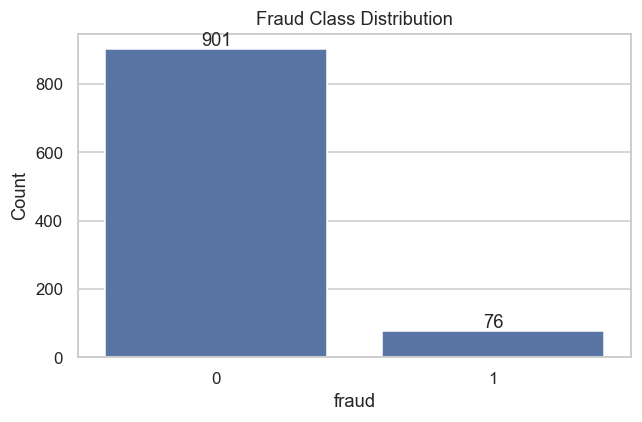

In [5]:
# --- 1) Fraud class distribution -------------------------------------------
col_fraud = resolve_column(df, "fraud", alias_map)
countplot_with_labels(df, col_fraud, title="Fraud Class Distribution")

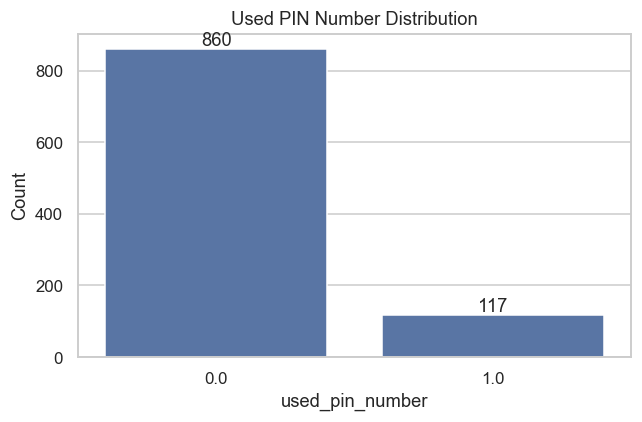

In [6]:
# --- 2) Used PIN Number distribution ---------------------------------------
col_pin = resolve_column(df, "used_pin_number", alias_map)
countplot_with_labels(df, col_pin, title="Used PIN Number Distribution")

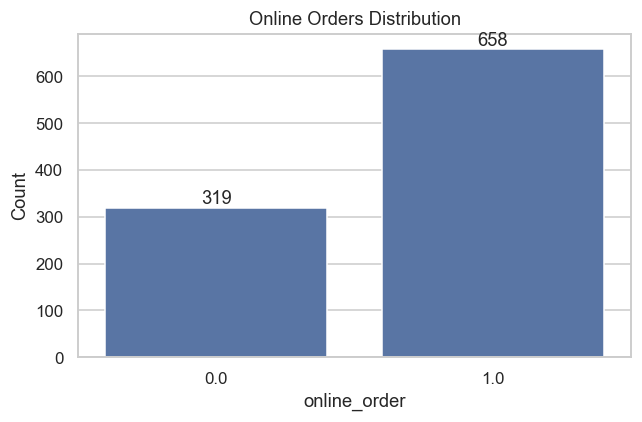

In [7]:
# --- 3) Online order(s) distribution ---------------------------------------
col_online = resolve_column(df, "online_orders", alias_map)  # will map to 'online_order' if needed
countplot_with_labels(df, col_online, title="Online Orders Distribution")

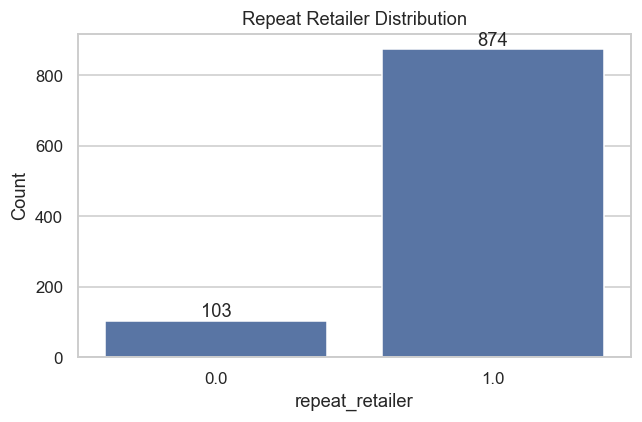

In [8]:
# --- 4) Repeat retailer distribution ---------------------------------------
col_repeat = resolve_column(df, "repeat_retailer", alias_map)
countplot_with_labels(df, col_repeat, title="Repeat Retailer Distribution")

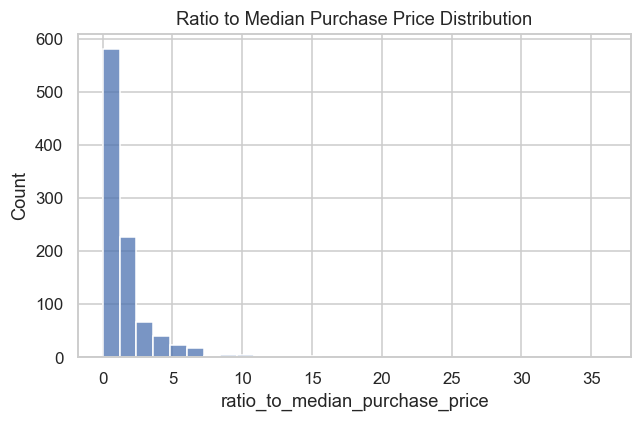

In [9]:
# --- 5) Ratio to median purchase price (histogram, 30 bins) -----------------
col_ratio = resolve_column(df, "ratio_to_median_purchase_price", alias_map)
histplot(df, col_ratio, title="Ratio to Median Purchase Price Distribution", bins=30)

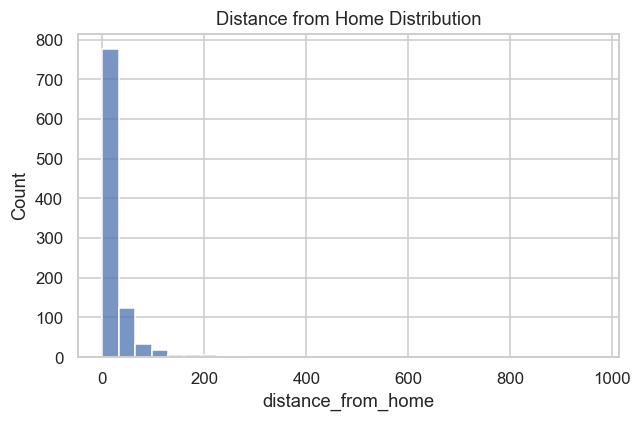

In [10]:
# --- 6) Distance from home (histogram, 30 bins) -----------------------------
col_home = resolve_column(df, "distance_from_home", alias_map)
histplot(df, col_home, title="Distance from Home Distribution", bins=30)

# Bivariate Visualizations

All plots below use the **cleaned dataset** (`df`) and add a `hue="fraud"` with:
- **Non-Fraudulent** = green
- **Fraudulent** = red

In [11]:
# --- Bivariate Visualizations (robust version) --------------------------------
# Assumes: df is your CLEANED dataset (no NaNs), and seaborn/matplotlib/pandas already imported.

# 0) Prepare a stable hue column with the exact labels and a fixed palette
df_plot = df.copy()
df_plot["fraud"] = df_plot["fraud"].astype(float).round().astype(int)
df_plot["fraud_label"] = df_plot["fraud"].map({0: "Non-Fraudulent", 1: "Fraudulent"})

FRAUD_HUE_ORDER = ["Non-Fraudulent", "Fraudulent"]
FRAUD_PALETTE   = {"Non-Fraudulent": "green", "Fraudulent": "red"}

def _ensure_binary(x):
    # Round any float-likes to 0/1 ints for clean axes; keeps as int
    return x.astype(float).round().astype(int)

def _resolve_online_column(dataframe):
    if "online_order" in dataframe.columns:
        return "online_order"
    if "online_orders" in dataframe.columns:
        return "online_orders"
    raise KeyError("Neither 'online_order' nor 'online_orders' exists in the DataFrame.")

def countplot_with_fraud(data, xcol, title, xlabel, ylabel):
    d = data.copy()
    d[xcol] = _ensure_binary(d[xcol])
    ax = sns.countplot(
        data=d,
        x=xcol,
        hue="fraud_label",
        hue_order=FRAUD_HUE_ORDER,
        palette=FRAUD_PALETTE,
        order=[0, 1],  # show 0 then 1
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(title="Class", frameon=True)
    plt.show()

# --- Patch: Stacked percentage plot (green bottom, red top) ------------------
def percentplot_with_fraud(data, xcol, title, xlabel):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    d = data.copy()
    # Ensure binary-looking feature is 0/1 ints
    d[xcol] = d[xcol].astype(float).round().astype(int)

    # Ensure human-readable fraud label exists
    if "fraud_label" not in d.columns:
        d["fraud"] = d["fraud"].astype(float).round().astype(int)
        d["fraud_label"] = d["fraud"].map({0: "Non-Fraudulent", 1: "Fraudulent"})

    # Flat counts → pivot to columns by fraud label
    counts = (
        d.groupby([xcol, "fraud_label"], as_index=False)
         .size()
         .rename(columns={"size": "count"})
    )

    pivot = (
        counts.pivot(index=xcol, columns="fraud_label", values="count")
              .reindex(columns=["Non-Fraudulent", "Fraudulent"])  # fixed column order
              .fillna(0)
    )

    # Row-wise percentages
    pct = pivot.div(pivot.sum(axis=1).replace(0, np.nan), axis=0).fillna(0) * 100.0

    # X order: prefer [0,1], but fall back to whatever exists
    desired = [0, 1]
    x_order = [v for v in desired if v in pct.index]
    if not x_order:
        x_order = list(pct.index)

    nf = pct.loc[x_order, "Non-Fraudulent"].to_numpy() if "Non-Fraudulent" in pct.columns else np.zeros(len(x_order))
    fr = pct.loc[x_order, "Fraudulent"].to_numpy() if "Fraudulent"   in pct.columns else np.zeros(len(x_order))

    x = np.arange(len(x_order))
    width = 0.6

    fig, ax = plt.subplots(figsize=(6, 4))
    b1 = ax.bar(x, nf, width=width, label="Non-Fraudulent", color="green")
    b2 = ax.bar(x, fr, width=width, bottom=nf, label="Fraudulent", color="red")

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Percentage (%)")
    ax.set_xticks(x, [str(v) for v in x_order])
    ax.set_ylim(0, 100)
    ax.legend(title="Class", frameon=True)
    ax.yaxis.grid(True, linestyle="--", alpha=0.4)

    # Annotate each stacked segment with its percentage
    for bars, heights, bottoms in [(b1, nf, np.zeros_like(nf)), (b2, fr, nf)]:
        for rect, h, bot in zip(bars, heights, bottoms):
            if h > 0:
                ax.text(
                    rect.get_x() + rect.get_width() / 2.0,
                    bot + h / 2.0,
                    f"{h:.1f}%",
                    ha="center", va="center"
                )

    plt.show()

def scatter_with_fraud(data, xcol, ycol, title, xlabel, ylabel):
    d = data.copy()
    ax = sns.scatterplot(
        data=d,
        x=xcol, y=ycol,
        hue="fraud_label",
        hue_order=FRAUD_HUE_ORDER,
        palette=FRAUD_PALETTE,
        alpha=0.6,
        s=30,
        edgecolor=None,
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(title="Class", frameon=True)
    plt.show()

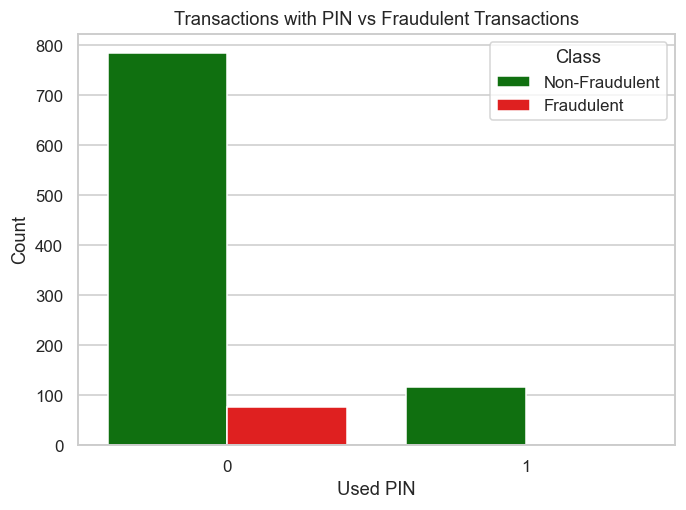

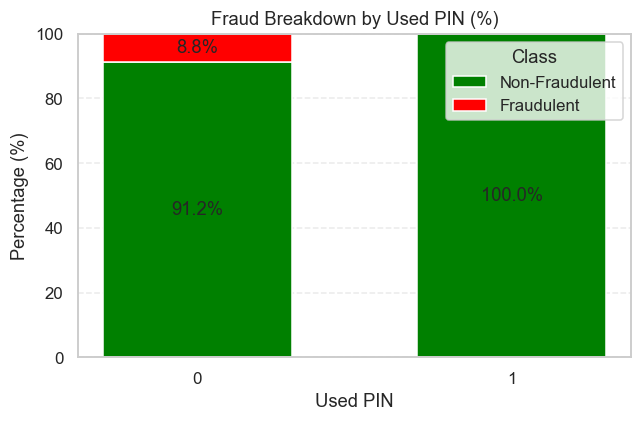

In [12]:
# 1) used_pin_number: countplot + percentage plot
countplot_with_fraud(
    df_plot,
    xcol="used_pin_number",
    title="Transactions with PIN vs Fraudulent Transactions",
    xlabel="Used PIN",
    ylabel="Count",
)
percentplot_with_fraud(
    df_plot,
    xcol="used_pin_number",
    title="Fraud Breakdown by Used PIN (%)",
    xlabel="Used PIN",
)

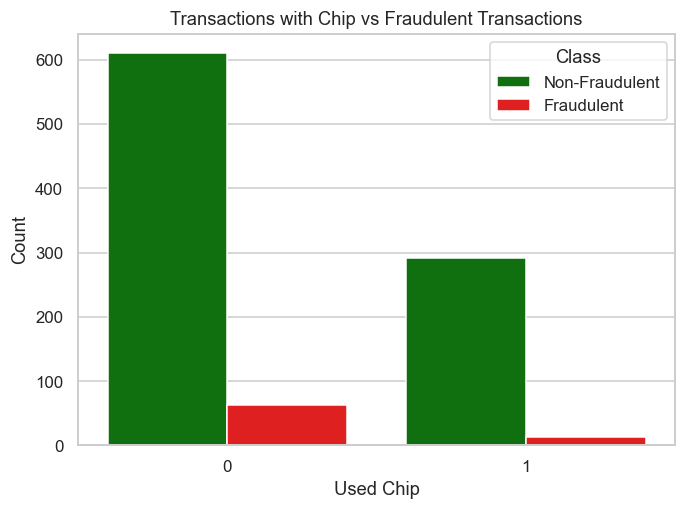

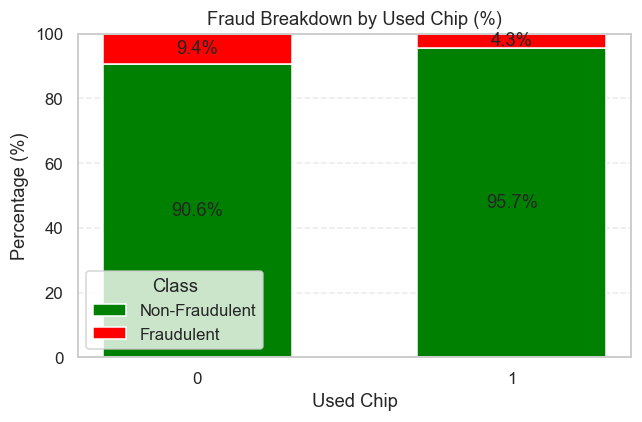

In [13]:
# 2) used_chip: countplot + percentage plot
countplot_with_fraud(
    df_plot,
    xcol="used_chip",
    title="Transactions with Chip vs Fraudulent Transactions",
    xlabel="Used Chip",
    ylabel="Count",
)
percentplot_with_fraud(
    df_plot,
    xcol="used_chip",
    title="Fraud Breakdown by Used Chip (%)",
    xlabel="Used Chip",
)

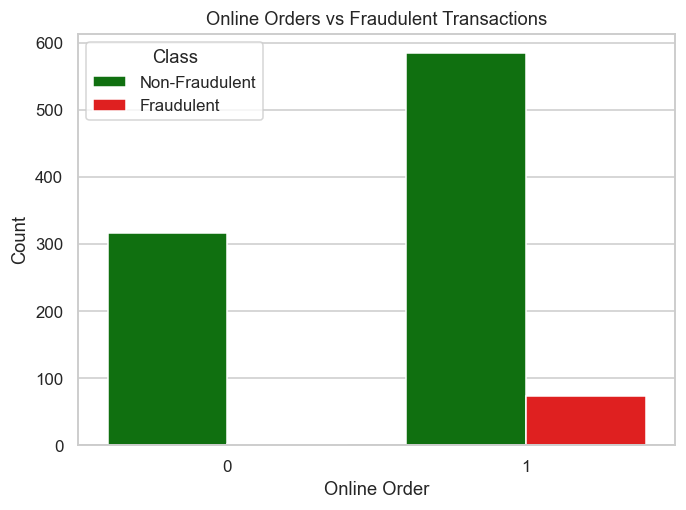

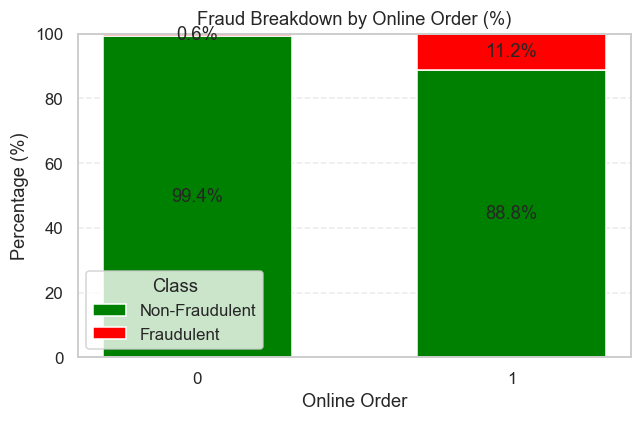

In [14]:
# 3) online_order(s): countplot + percentage plot
online_col = _resolve_online_column(df_plot)
countplot_with_fraud(
    df_plot,
    xcol=online_col,
    title="Online Orders vs Fraudulent Transactions",
    xlabel="Online Order",
    ylabel="Count",
)
percentplot_with_fraud(
    df_plot,
    xcol=online_col,
    title="Fraud Breakdown by Online Order (%)",
    xlabel="Online Order",
)

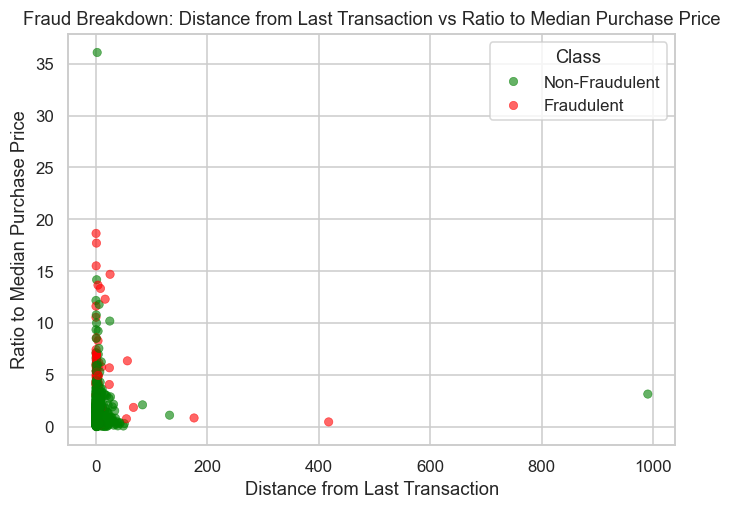

In [15]:
# 4) Scatter: distance_from_last_transaction vs ratio_to_median_purchase_price
scatter_with_fraud(
    df_plot,
    xcol="distance_from_last_transaction",
    ycol="ratio_to_median_purchase_price",
    title="Fraud Breakdown: Distance from Last Transaction vs Ratio to Median Purchase Price",
    xlabel="Distance from Last Transaction",
    ylabel="Ratio to Median Purchase Price",
)

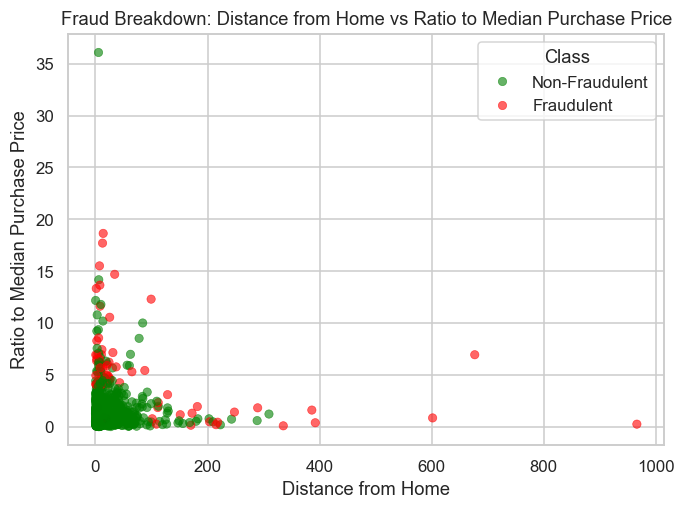

In [16]:
# 5) Scatter: distance_from_home vs ratio_to_median_purchase_price
scatter_with_fraud(
    df_plot,
    xcol="distance_from_home",
    ycol="ratio_to_median_purchase_price",
    title="Fraud Breakdown: Distance from Home vs Ratio to Median Purchase Price",
    xlabel="Distance from Home",
    ylabel="Ratio to Median Purchase Price",
)